**Nama**: Muhammad Maula Irfani

**NIM**: 162112133092

Instruksi Praktikum:
1. Buat file ipynb baru.
2. Coba perbaiki training dan validation accuracy (boleh modifikasi preprocessing, arsitektur CNN dst).
3. Berikan markdown untuk tiap step pada file ipynb yang akan disubmit.
4. Tunjukkan preview beberapa gambar dan labelnya yang merupakan hasil dari CNN
4. Submit di hebat dengan batas waktu seminggu beserta dengan laporannya.

link data: https://www.kaggle.com/datasets/juliencalenge/felidae-tiger-lion-cheetah-leopard-puma?select=Felidae

Di bawah ini kita mengimpor library yang dibutuhkan. Library yang penting yaitu tensorflow dan keras, dimana kita akan membangun model neural network menggunakan library ini. Dari kedua library tersebut, kita mengimpor layer dan optimizer yang dibutuhkan.

In [1]:
import numpy as np
from ipywidgets import interact, widgets
import os
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras import optimizers
from keras import Model
import keras

from sklearn.metrics import classification_report

**Download Dataset**

Di bawah ini kita mengunduh dataset menggunakan Kaggle API. Yang dibutuhkan adalah mengunggah kaggle token akun saya pribadi, lalu kita langsung dapat mengunduh dataset.

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d juliencalenge/felidae-tiger-lion-cheetah-leopard-puma

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 67 bytes
 98% 142M/145M [00:05<00:00, 36.6MB/s]
100% 145M/145M [00:05<00:00, 29.0MB/s]


**Ekstrak Zip**

Di bawah ini kita mengekstrak dataset felidae yang masih berupa zip.

In [3]:
import zipfile
with zipfile.ZipFile("/content/felidae-tiger-lion-cheetah-leopard-puma.zip", 'r') as zip_ref:
  zip_ref.extractall(".")

**Load Data and Preprocessing**

Di bawah ini kita melakukan preprocessing gambar berupa mengubah shape dari setiap gambar menjadi 200x200 dan melakukan normalisasi dengan membagi setiap pixel dengan 255. Setelah itu setiap gambar di masukkan ke dalam list images dan nama spesies dimasukkan ke dalam list species.

In [4]:
images = []
species = []
folderin = os.listdir('./Felidae/')
for folder in folderin:
    dir = os.listdir('./Felidae/'+folder)
    for image in dir:
        # print(image)
        species.append(image[:-8])
        image = Image.open('./Felidae/'+folder+'/'+image).convert('RGB')
        image = np.asarray(image.resize((200,200)))
        image = image/255
        # print(image.shape)
        images.append(image)

Di bawah ini kita menampilkan gambar dengan bantuan `ipywidgets`

In [5]:
def showimage(imageno):
    plt.figure(figsize=(5,5))
    plt.imshow(images[imageno])

interactive(children=(IntSlider(value=10, description='imageno', max=219), Output()), _dom_classes=('widget-in…

<function __main__.showimage(imageno)>

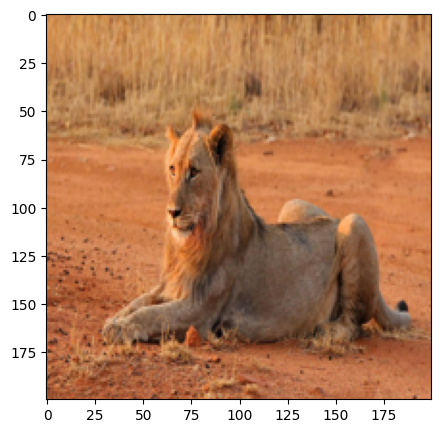

In [6]:
interact(showimage,
    imageno=widgets.IntSlider(min=0,max=219,step=1,value=10))

Di bawah ini kita melakukan mapping label yang masih berupa string menjadi integer dengan tujuan agar bisa diolah oleh model machine learning.

In [7]:
uniquelabel = np.unique(species)

label_to_int = {}  # Create a dictionary to map labels to integers

for i in range(len(uniquelabel)):
    replace = uniquelabel[i]
    label_to_int[replace] = i

print(label_to_int)

# Now, map the labels to integers using the dictionary
species_as_int = [label_to_int[label] for label in species]

print(species_as_int)

{'Cheetah': 0, 'Leopard': 1, 'Lion': 2, 'Puma': 3, 'Tiger': 4}
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


Setelah itu kita juga melakukan encoding menjadi one hot agar shapenya sesuai dengan output dari model neural network yang akan dibentuk.

In [8]:
one_hot_species = keras.utils.to_categorical(species_as_int, 5)
print(one_hot_species)

[[0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


**Split Data**

Di bawah ini kita membagi data menjadi 2 set, yaitu train dan test dengan proporsi 80:20. Terlihat bahwa kita memiliki 194 data pada train set dan 49 data untuk test set.

In [9]:
images=np.array(images)
labels=np.array(one_hot_species)
X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
# Checking the shape
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(194, 200, 200, 3)
(49, 200, 200, 3)
(194, 5)
(49, 5)


Di bawah ini kita membangun model neural network dengan bentuk sequential, artinya setiap input akan melewati layer satu per satu dan outputnya akan masuk ke layer berikutnya hingga layer output.

Di dalamnya terdapat 3 layer konvolusi 2D dengan jumlah filter yang meningkat mulai dari 50-125 dengan ukuran 3x3, sehingga model ini dapat mengambil fitur pada gambar dengan lebih detail. Padding yang digunakan adalah same, artinya output dari layer konvolusi akan berukuran sama dengan inputnya.

Selain itu, terdapat layer max pooling dengan pool size 2x2, artinya ukuran gambar akan menyusut dengan faktor 0.5 setelah masuk ke layer ini.

Terdapat juga layer dropout yang digunakan untuk mencegah overfitting.

Setelah memasuki rangkaian layer konvolusi, gambar akan diflatten dan memasuki 2 layer dense dengan masing-masing neuron berjumlah 500 dan 250. Baru setelah itu terdapat output layer dengan jumlah neuron 5 karena dataset kita terdapat 5 kelas.

Model di compile dengan loss function categorical cross entropy, karena ini termasuk task multi-class classification dan optimizer adam dengan learning rate default yaitu 0.0001

In [10]:
model = Sequential()

# convolutional layer
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(200,200,3)))

# convolutional layer
model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# flatten output of conv
model.add(Flatten())

# hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(5, activation='softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')


Pada summary di bawah ini kita bisa melihat bahwa model memiliki 156.496.730 parameter yang akan ditrain

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 50)      1400      
                                                                 
 conv2d_1 (Conv2D)           (None, 200, 200, 75)      33825     
                                                                 
 max_pooling2d (MaxPooling2  (None, 100, 100, 75)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 100, 100, 75)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 100, 100, 125)     84500     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 50, 50, 125)       0         
 g2D)                                                   

Di bawah ini kita melakukan training model dengan batch size 20 selama 20 epochs

In [41]:
hist = model.fit(X_train, Y_train, batch_size=20, epochs=20, validation_data=(X_test, Y_test))

Epoch 1/20
10/10 [==============================] - 2s 199ms/step - loss: 1.6122 - accuracy: 0.2113 - val_loss: 1.6091 - val_accuracy: 0.2041
Epoch 2/20
10/10 [==============================] - 2s 199ms/step - loss: 1.6055 - accuracy: 0.2423 - val_loss: 1.6088 - val_accuracy: 0.2041
Epoch 3/20
10/10 [==============================] - 2s 203ms/step - loss: 1.5949 - accuracy: 0.2474 - val_loss: 1.6115 - val_accuracy: 0.2041
Epoch 4/20
10/10 [==============================] - 2s 209ms/step - loss: 1.6086 - accuracy: 0.2113 - val_loss: 1.6088 - val_accuracy: 0.2041
Epoch 5/20
10/10 [==============================] - 2s 219ms/step - loss: 1.6058 - accuracy: 0.2320 - val_loss: 1.6096 - val_accuracy: 0.2041
Epoch 6/20
10/10 [==============================] - 2s 215ms/step - loss: 1.6037 - accuracy: 0.2371 - val_loss: 1.6109 - val_accuracy: 0.2041
Epoch 7/20
10/10 [==============================] - 2s 209ms/step - loss: 1.6071 - accuracy: 0.2474 - val_loss: 1.6103 - val_accuracy: 0.2041
Epoch 

In [42]:
proba = model.predict(X_test)
y_pred = list()
y_test = list()
for i in range(len(proba)):
    y_pred.append(proba[i].argmax())
    y_test.append(Y_test[i].argmax())

2/2 [==============================] - 2s 583ms/step


Setelah di training, kita dapat melihat report hasil klasifikasinya. Terlihat bahwa model hanya meraih akurasi 16%

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.09      0.20      0.13        10
           1       0.20      0.38      0.26         8
           2       0.20      0.10      0.13        10
           3       1.00      0.12      0.22         8
           4       0.17      0.08      0.11        13

    accuracy                           0.16        49
   macro avg       0.33      0.18      0.17        49
weighted avg       0.30      0.16      0.16        49



In [17]:
def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

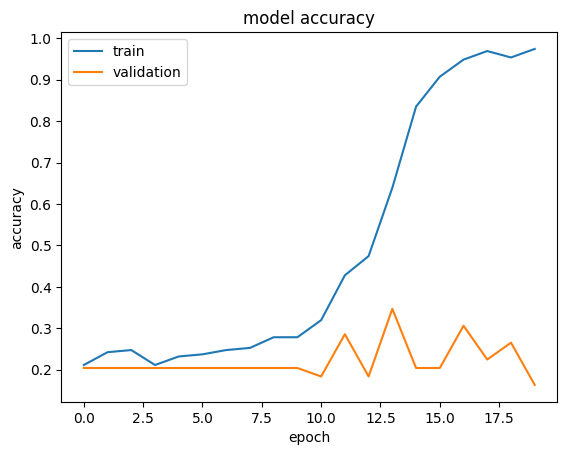

In [45]:
plot_hist(hist)

Visualisasi di atas menunjukkan akurasi yang di raih model pada setiap epoch selama proses training. Terlihat bahwa akurasi pada train set mengalami kenaikan hampir mendekati 100%, sedangkan akurasi pada test set tidak ikut naik. Hal ini menunjukkan model mengalami overfitting.

# Perbaikan

Perbaikan yang akan dilakukan adalah mengubah modelnya dengan cara menambahkan pretrained model Xception yang ada pada library tensorflow.


Xception adalah inovasi dalam arsitektur CNN, mengusung pendekatan "depthwise separable convolutions." Idenya adalah menggantikan konvolusi tradisional dengan dua tahap terpisah: konvolusi spasial dan konvolusi channel-wise. Hal ini membantu mengurangi jumlah parameter, meningkatkan efisiensi komputasi, dan memungkinkan model untuk memahami relasi spasial dan saluran data dengan lebih baik. Pendekatan ini ditemukan efektif dalam meningkatkan kinerja pada tugas pengenalan gambar.

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.applications import Xception

Kita juga akan menambahkan layer augmentasi agar model belajar lebih sulit, hal ini akan menghasilkan model yang lebih robust. Augmentasinya terdiri dari random rotation, translation, flip, dan contrast.

In [13]:
# Layer Augmentasi
img_augmentation = Sequential(
    [
        layers.RandomRotation(factor=0.15),
        layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
        layers.RandomFlip(),
        layers.RandomContrast(factor=0.1),
    ],
    name="img_augmentation",
)

Di bawah ini kita membangun model dengan menambahkan layer output (top layer) pada model Xception yang telah di latih pada dataset imagenet.

`model.trainable = True` menunjukkan bahwa kita akan melakukan training pada parameter Xception, sehingga proses training mungkin akan menjadi lebih lama.

Kemudian, lapisan global average pooling, normalisasi batch, dropout, dan lapisan output Dense dengan fungsi aktivasi softmax ditambahkan untuk membangun top layers dari model.

Model kemudian di-compile menggunakan optimizer Adam dengan learning rate 0.00005, dan loss function categorical crossentropy untuk multi-class classification.


In [14]:
inputs = layers.Input(shape=X_train[0].shape)
x = img_augmentation(inputs)
model = Xception(include_top=False, input_tensor=x, weights="imagenet")
model.trainable = True

# Rebuild top
x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
x = layers.BatchNormalization()(x)

top_dropout_rate = 0.3
x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
outputs = layers.Dense(5, activation="softmax", name="pred")(x)

# Compile
model = tf.keras.Model(inputs, outputs)
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
model.compile(
    optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
)

83683744/83683744 [==============================] - 3s 0us/step


Di bawah ini kita akan melatih model selama 20 epochs dengan batch size sebesar 32.

In [15]:
epochs = 20
hist = model.fit(X_train, Y_train,
                 epochs=epochs,
                 validation_data=(X_test, Y_test),
                 verbose=2, batch_size=32,
)

Epoch 1/20
7/7 - 44s - loss: 1.8621 - accuracy: 0.3557 - val_loss: 1.2111 - val_accuracy: 0.7551 - 44s/epoch - 6s/step
Epoch 2/20
7/7 - 3s - loss: 0.9092 - accuracy: 0.6186 - val_loss: 0.9415 - val_accuracy: 0.8367 - 3s/epoch - 392ms/step
Epoch 3/20
7/7 - 3s - loss: 0.5861 - accuracy: 0.7680 - val_loss: 0.8038 - val_accuracy: 0.8367 - 3s/epoch - 367ms/step
Epoch 4/20
7/7 - 3s - loss: 0.4648 - accuracy: 0.8299 - val_loss: 0.7368 - val_accuracy: 0.8776 - 3s/epoch - 387ms/step
Epoch 5/20
7/7 - 3s - loss: 0.4649 - accuracy: 0.8299 - val_loss: 0.7142 - val_accuracy: 0.8776 - 3s/epoch - 389ms/step
Epoch 6/20
7/7 - 3s - loss: 0.4250 - accuracy: 0.8608 - val_loss: 0.6908 - val_accuracy: 0.8776 - 3s/epoch - 397ms/step
Epoch 7/20
7/7 - 3s - loss: 0.2353 - accuracy: 0.9175 - val_loss: 0.6585 - val_accuracy: 0.8776 - 3s/epoch - 398ms/step
Epoch 8/20
7/7 - 3s - loss: 0.2675 - accuracy: 0.9072 - val_loss: 0.6261 - val_accuracy: 0.8776 - 3s/epoch - 375ms/step
Epoch 9/20
7/7 - 3s - loss: 0.2405 - accu

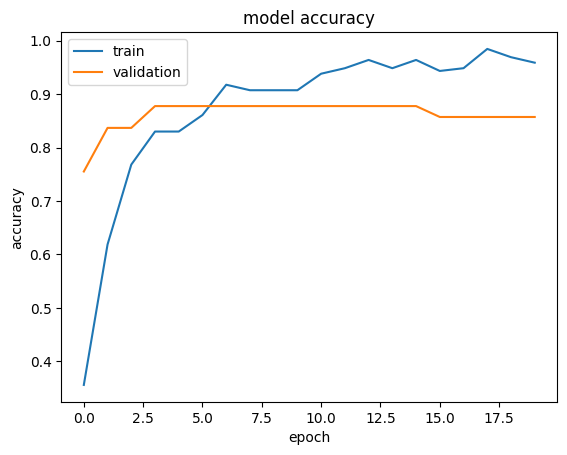

In [18]:
plot_hist(hist)

Visualisasi akurasi di atas menunjukkan bahwa model belajar dengan baik dan tidak mengalami overfitting karena akurasi pada data train dan test sama-sama meningkat seiring epoch.

In [19]:
proba = model.predict(X_test, verbose=0)
y_pred = [x.argmax() for x in proba]
y_test = [x.argmax() for x in Y_test]
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.90      0.78        10
           1       0.86      0.60      0.71        10
           2       0.92      0.92      0.92        13
           3       0.83      0.83      0.83         6
           4       1.00      1.00      1.00        10

    accuracy                           0.86        49
   macro avg       0.86      0.85      0.85        49
weighted avg       0.87      0.86      0.85        49



Hasil classification report di atas menunjukkan bahwa model meraih akurasi sebesar 94% pada data test. Hal tersebut menunjukkan bahwa kita telah berhasil memperbaiki model sebelumnya yang memiliki hasil rendah dengan cara memanfaatkan pretrained model Xception.

In [30]:
int_to_label = {0: 'Cheetah', 1: 'Leopard', 2: 'Lion', 3: 'Puma', 4: 'Tiger'}

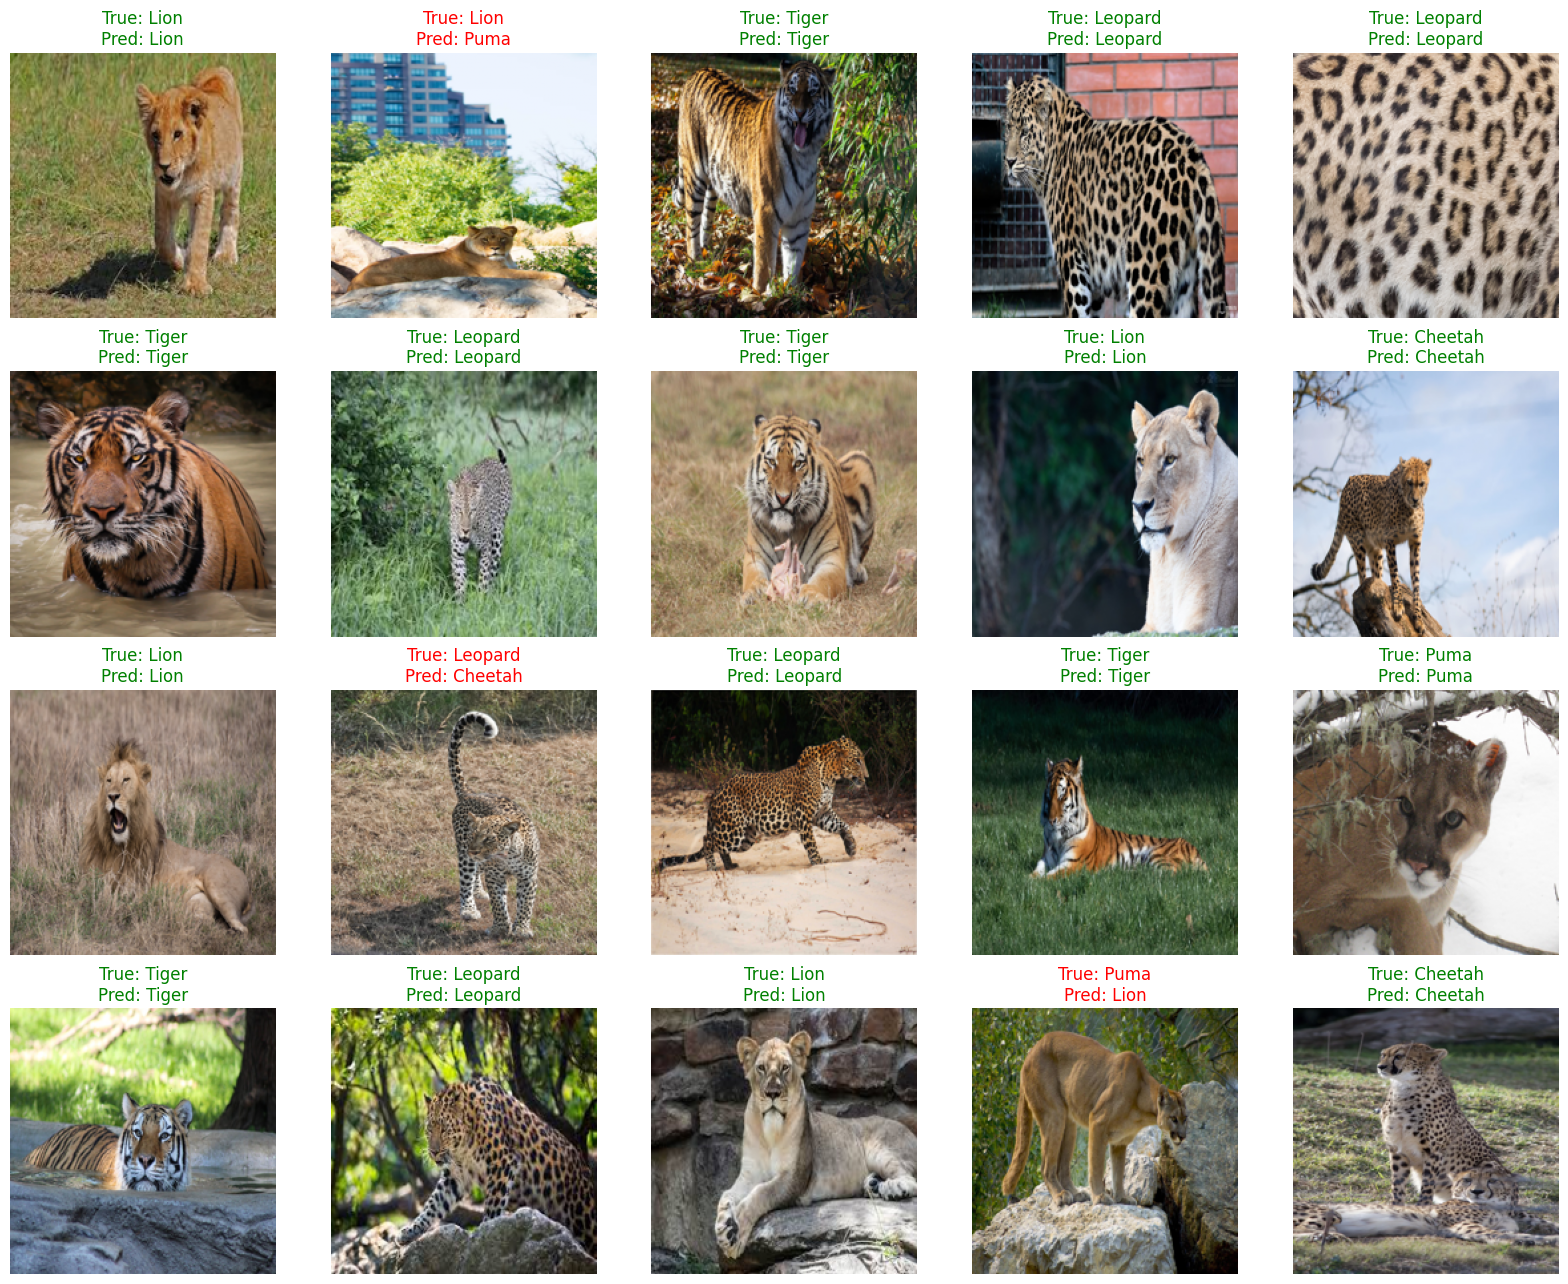

In [32]:
plt.figure(figsize=(20, 20))

for i in range(20):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_test[i])
    true_label = int_to_label[y_test[i]]
    pred_label = int_to_label[y_pred[i]]
    title_color = 'green' if y_test[i] == y_pred[i] else 'red'
    plt.title(f"True: {true_label}\nPred: {pred_label}", color=title_color)
    plt.axis('off')

Pada visualisasi di atas, model telah cukup baik dalam melakukan prediksi, dibuktikan dengan dari 20 kali melakukan prediksi, 17 kali benar.